In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


N = 30
T = 100000

In [46]:
plt.rcParams['font.family'] 	= 'serif'
plt.rcParams['font.size'] 		= 30
plt.rcParams['axes.labelsize'] 	= 30
plt.rcParams['figure.figsize'] = (9, 6)

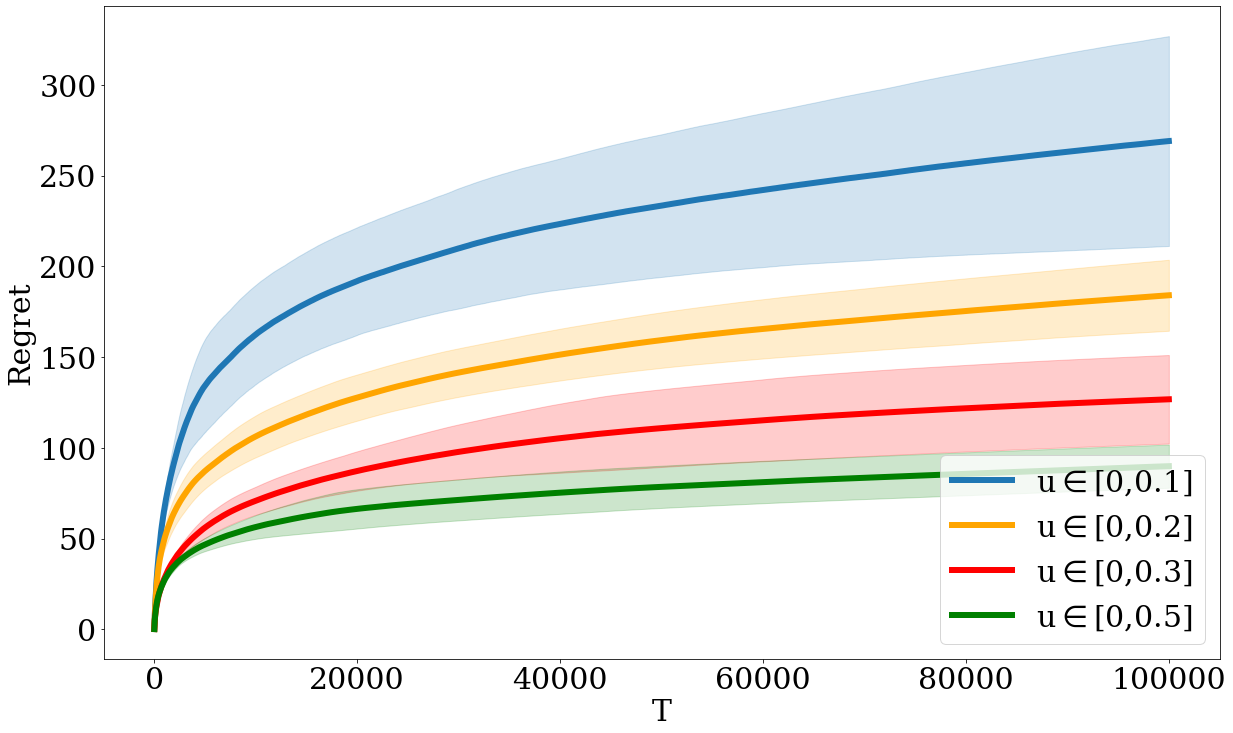

In [88]:
totalpayoff01 = []
totalpayoff02 = []
totalpayoff03 = []
totalpayoff05 = []
for i in range(1,11):
    f = open('result/data_0.1_'+str(i)+'.txt','rb')
    totalpayoff1 = pickle.load(f)
    f.close()
    totalpayoff01.append(totalpayoff1)
    f = open('result/data_0.2_'+str(i)+'.txt','rb')
    totalpayoff2 = pickle.load(f)
    f.close()
    totalpayoff02.append(totalpayoff2)
    f = open('result/data_0.3_'+str(i)+'.txt','rb')
    totalpayoff3 = pickle.load(f)
    f.close()
    totalpayoff03.append(totalpayoff3)
    f = open('result/data_0.5_'+str(i)+'.txt','rb')
    totalpayoff5 = pickle.load(f)
    f.close()
    totalpayoff05.append(totalpayoff5)
    
totalpayoff01 = np.array(totalpayoff01)
totalpayoff01_mean = np.mean(totalpayoff01,axis=0)
totalpayoff01_std = np.std(totalpayoff01,axis=0)
totalpayoff02 = np.array(totalpayoff02)
totalpayoff02_mean = np.mean(totalpayoff02,axis=0)
totalpayoff02_std = np.std(totalpayoff02,axis=0)
totalpayoff03 = np.array(totalpayoff03)
totalpayoff03_mean = np.mean(totalpayoff03,axis=0)
totalpayoff03_std = np.std(totalpayoff03,axis=0)
totalpayoff05 = np.array(totalpayoff05)
totalpayoff05_mean = np.mean(totalpayoff05,axis=0)
totalpayoff05_std = np.std(totalpayoff05,axis=0)

f, (ax1) = plt.subplots(1, 1, gridspec_kw={'height_ratios': [4]}, sharex=True,figsize=(20,12))
t=np.linspace(0,T-1,T)
ax1.plot(t,totalpayoff01_mean,linewidth=6,color='C0',label='u$\in$[0,0.1]')
ax1.fill_between(t, totalpayoff01_mean-totalpayoff01_std,totalpayoff01_mean+totalpayoff01_std,color='C0', alpha=0.2)
ax1.plot(t,totalpayoff02_mean,linewidth=6,color='orange',label='u$\in$[0,0.2]')
ax1.fill_between(t, totalpayoff02_mean-totalpayoff02_std,totalpayoff02_mean+totalpayoff02_std,color='orange', alpha=0.2)
ax1.plot(t,totalpayoff03_mean,linewidth=6,color='red',label='u$\in$[0,0.3]')
ax1.fill_between(t, totalpayoff03_mean-totalpayoff03_std,totalpayoff03_mean+totalpayoff03_std,color='red', alpha=0.2)
ax1.plot(t,totalpayoff05_mean,linewidth=6,color='green',label='u$\in$[0,0.5]')
ax1.fill_between(t, totalpayoff05_mean-totalpayoff05_std,totalpayoff05_mean+totalpayoff05_std,color='green', alpha=0.2)
ax1.legend(loc='lower right', prop={'size': 30})

plt.xlabel('T'); 
plt.ylabel('Regret');
# plt.ylim((0, 400))
plt.savefig("algo_diffu.png")
plt.show()

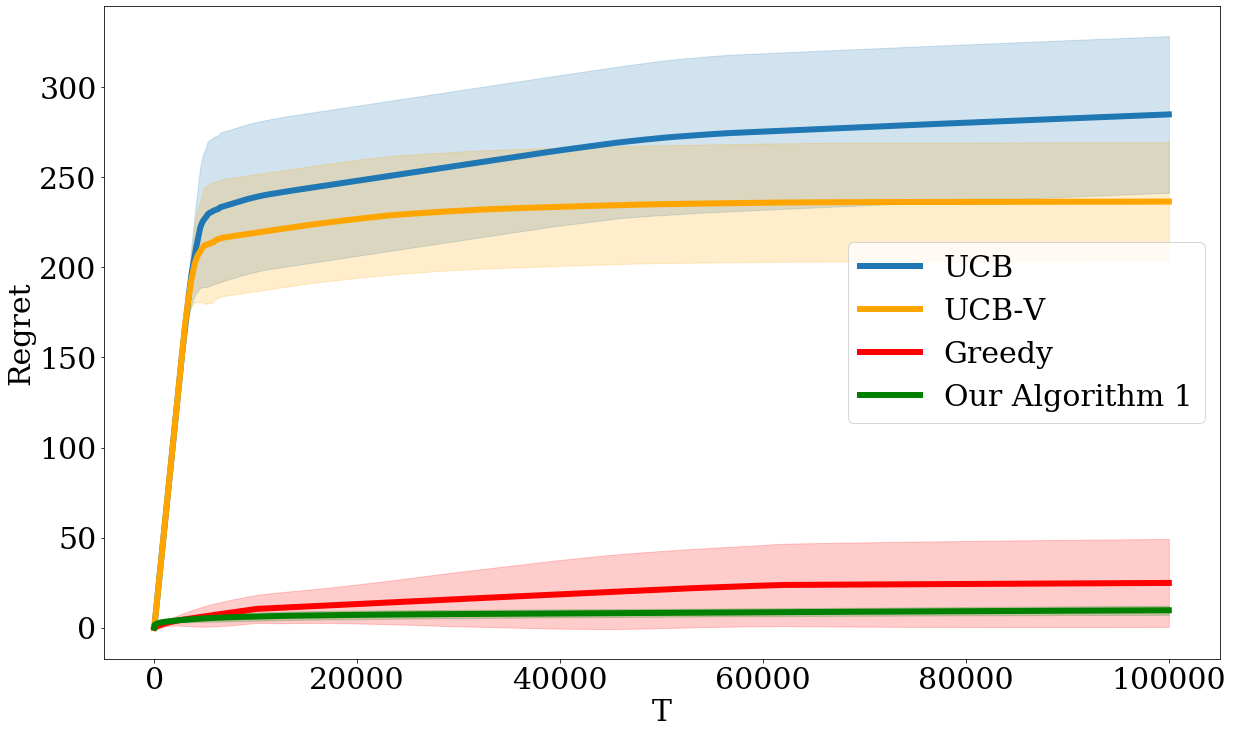

In [87]:
T=100000
ucb = []
ucbv = []
greedy = []
algo1 = []
for i in range(1,11):
    f = open('result/ucbdata_1_'+str(i)+'.txt','rb')
    ucbdata = pickle.load(f)
    f.close()
    ucb.append(ucbdata)
    f = open('result/ucbvdata_1_'+str(i)+'.txt','rb')
    ucbvdata = pickle.load(f)
    f.close()
    ucbv.append(ucbvdata)
    f = open('result/data_1_'+str(i)+'.txt','rb')
    algo1data = pickle.load(f)
    f.close()
    algo1.append(algo1data)
for i in range(41,47):
    f = open('result/grdata5_5_'+str(i)+'.txt','rb')
    greedydata = pickle.load(f)[:T]
    f.close()
    greedy.append(greedydata)
    
ucb = np.array(ucb)
ucb_mean = np.mean(ucb,axis=0)
ucb_std = np.std(ucb,axis=0)
ucbv = np.array(ucbv)
ucbv_mean = np.mean(ucbv,axis=0)
ucbv_std = np.std(ucbv,axis=0)
greedy = np.array(greedy)
greedy_mean = np.mean(greedy,axis=0)
greedy_std = np.std(totalpayoff03,axis=0)
algo1 = np.array(algo1)
algo1_mean = np.mean(algo1,axis=0)
algo1_std = np.std(algo1,axis=0)

f, (ax1) = plt.subplots(1, 1, gridspec_kw={'height_ratios': [4]}, sharex=True,figsize=(20,12))
t=np.linspace(0,T-1,T)
ax1.plot(t,ucb_mean,linewidth=6,color='C0',label='UCB')
ax1.fill_between(t, ucb_mean-ucb_std,ucb_mean+ucb_std,color='C0', alpha=0.2)
ax1.plot(t,ucbv_mean,linewidth=6,color='orange',label='UCB-V')
ax1.fill_between(t, ucbv_mean-ucbv_std,ucbv_mean+ucbv_std,color='orange', alpha=0.2)
ax1.plot(t,greedy_mean,linewidth=6,color='red',label='Greedy')
ax1.fill_between(t, greedy_mean-greedy_std,greedy_mean+greedy_std,color='red', alpha=0.2)
ax1.plot(t,algo1_mean,linewidth=6,color='green',label='Our Algorithm 1')
ax1.fill_between(t, algo1_mean-algo1_std,algo1_mean+algo1_std,color='green', alpha=0.2)
ax1.legend(loc='best', prop={'size': 30})

plt.xlabel('T'); 
plt.ylabel('Regret');
# plt.yscale('log')
# plt.ylim((0, 400))
plt.savefig("algo_compare.png")
plt.show()